# KNN implementation in python

KNN is an important ML Algorithm used for predicting data, to which class it belongs to.

Primary and Main Step involved:

1) Storing the data for training purpose.

### Prediction Algorithm:

1) Calculating distance of data-point to all data-points available in the data.

2) Sorting the points in the data in increasing order of distance from interested data-point.

3) Predicting majority label with respect to 'K' closest points. 


for more info about KNN:https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

### importing data manipulation & visualization libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### import Random dataset 

In [4]:
df = pd.read_csv('../Downloads/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/KNN_Project_Data')

In [5]:
df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


### Scaling the values in the data

KNN classifier predicts the class of a given test observation by identifying the data-points that are nearest to it, the scale of the variables matters. 

Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Thus, Standardizing the variables is viable option.

In [6]:
from sklearn.preprocessing import StandardScaler 

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [11]:
df_feat

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


## Train Test Split

#### Notations:

x_train : training data-set

y_train : set of labels on training set x

x_test : testing data-set

y_test : set of labels on testing set x



In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=12)

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [18]:
pred = knn.predict(x_test)

## Predictions calculated

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,pred))

[[114  22]
 [ 36 128]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       136
           1       0.85      0.78      0.82       164

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



# Choosing K value

##### (Elbow method to pick a good K-value)

In [22]:
# calculating minimum error rate for which K value belongs to

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

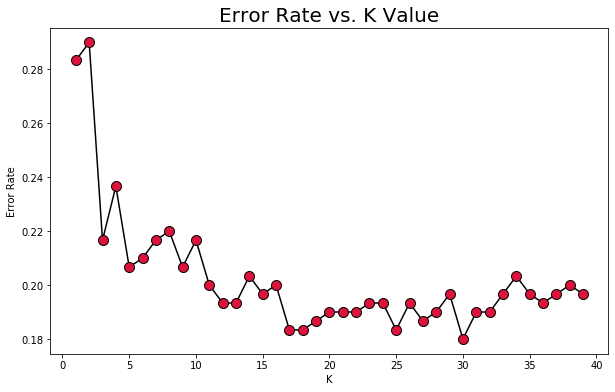

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='solid', marker='o',
         markerfacecolor='crimson', markersize=10)
plt.title('Error Rate vs. K Value',size=20)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [25]:
min(error_rate)

0.18

In [40]:
# K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 96  40]
 [ 45 119]]


              precision    recall  f1-score   support

           0       0.68      0.71      0.69       136
           1       0.75      0.73      0.74       164

    accuracy                           0.72       300
   macro avg       0.71      0.72      0.71       300
weighted avg       0.72      0.72      0.72       300



In [44]:
# K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[110  26]
 [ 29 135]]


              precision    recall  f1-score   support

           0       0.79      0.81      0.80       136
           1       0.84      0.82      0.83       164

    accuracy                           0.82       300
   macro avg       0.81      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



## Conclusion

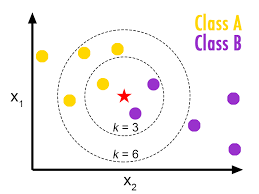

In [57]:
from IPython.display import Image
Image(filename='knn_img.png') 

Main objective of KNN-classification algorithm is to predict any random data-point to which class it belongs to, for this the K-value plays a vital role. Hence, we choose a K-value which has minimum error-rate, which brings us to a consensus that any random data-point when brought into analysis can be predicted to which class it belongs to depending on the "optimum K-value".